In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Test learning algorithms on the classic Iris dataset.

@author: Phil Weir <phil.weir@flaxandteal.co.uk>
@license: MIT
"""

import os
import numpy as np
import pandas

from sklearn import svm

from sklearn import datasets
from pandas.plotting import scatter_matrix

def run():
    # Why is this if-statement here? Why don't we just use lines 21-22?
        # If the file does not exist, the code downloads the Iris dataset from
        # the UCI Machine Learning Repository and saves it locally as iris.data.
        # Then code can be run multiple times without re-downloading
        # the dataset each time, saving time.
        # Also ensures that the dataset is available offline once it has been downloaded.
    if not os.path.exists('iris.data'):
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
        df = pandas.read_csv(url, header=None)
        df.to_csv('iris.data', header=False, index=False)

    df = pandas.read_csv('./iris.data', header=None)

    # When you are happy with what this looks like, remove it!
    # print(df)

    # Why is this important?
    # This helps in making the training and testing datasets more representative
    # of the overall distribution of the data.
    # If the dataset is not randomized, This would result in a biased model that
    # performs poorly on real-world data.

    reordering = np.random.permutation(df.index)
    df = df.reindex(reordering)

    # This is the set of inputs
    X_training = df.iloc[:-30, :-1]
    # This is the known classifiers
    y_training_target = df.iloc[:-30, -1]

    # This set we will use for testing the model
    X_testing = df.iloc[-30:, :-1]
    # We will measure our predictions against these
    y_testing_target = df.iloc[-30:, -1]

    # Make a model
    classifier = svm.SVC(kernel='linear', C=1).fit(X_training, y_training_target)

    # Evaluate it
    score = classifier.score(X_testing, y_testing_target)
    print(score)

    # What type of flower is an iris with:
    #   Sepal length: 4.7cm
    #   Sepal width: 3.4cm
    #   Petal length: 1.1cm
    #   Petal width: 0.2cm
    # ?
    samples = [
        [4.7, 3.4, 1.1, 0.2]
    ]
    print(classifier.predict(samples))

if __name__ == "__main__":
    run()

0.9666666666666667
['Iris-setosa']


Creating the SVM Classifier:

svm.SVC(kernel='linear', C=1) initializes an SVM classifier object.
kernel='linear' specifies that the classifier should use a linear kernel. This means that the decision boundary will be a linear hyperplane.

C=1 is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller C encourages a larger margin, while a larger C tries to classify all training examples correctly.

The parameter C directly influences this penalty term:

A larger C means a higher penalty for misclassification, leading the SVM to strive for fewer misclassifications even if the margin is smaller.

A smaller C means a lower penalty for misclassification, allowing the SVM to increase the margin even if some points are misclassified or fall within the margin.

# TASKS
## 0 - What, in words, is each slicing operation doing?


```
X_training = df.iloc[:-30, :-1]
y_training_target = df.iloc[:-30, -1]
X_testing = df.iloc[-30:, :-1]
y_testing_target = df.iloc[-30:, -1]
```

  - The first part (df.iloc[:-30, :-1]) selects all but the last 30 rows for the training input features.

  - The second part (df.iloc[:-30, -1]) selects the corresponding target labels for training.

  - Similarly, the last 30 rows are used for testing (X_testing and y_testing_target).

## 1 - Download the CSV and open it from the same folder as script (still with read_csv)

In [ ]:
import pandas as pd

# Read the CSV file from the current directory
df = pd.read_csv('/content/iris.data', header=None)
print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


## 2 - Add plots of sepal length, sepal width, petal length and petal width using Pandas'
  - scatter_matrix (hint: create a dataframe with those four columns)
  - RadViz (familiar looking dataset on the Pandas manual page!)

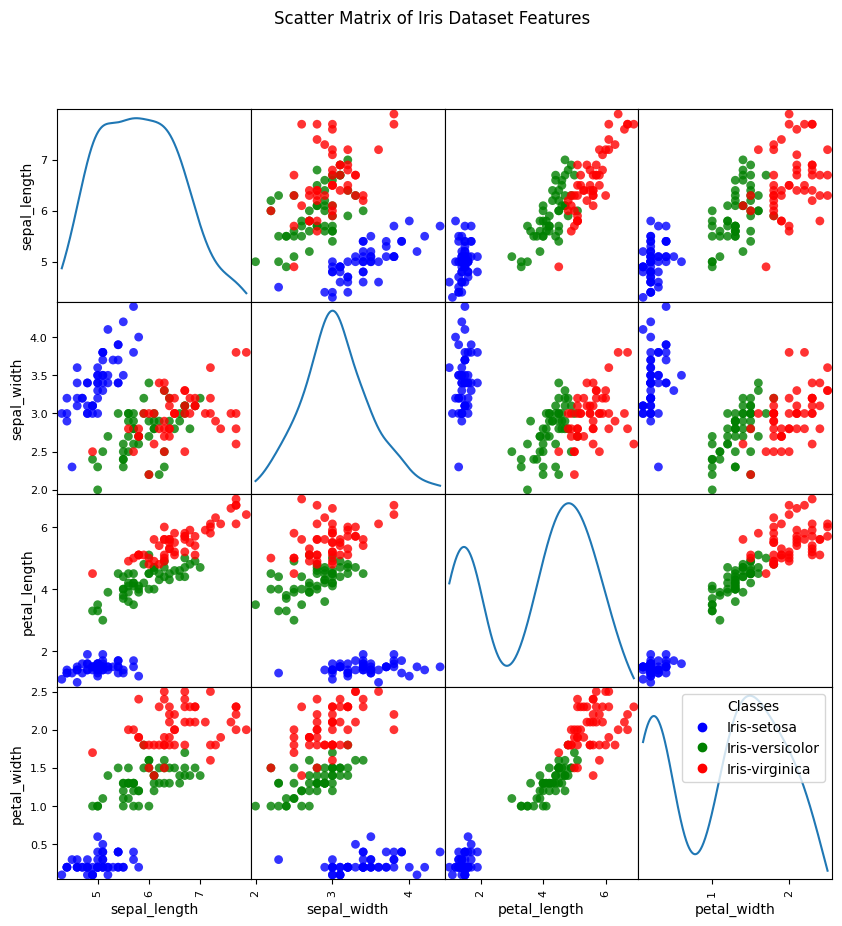

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load the Iris dataset
df = pd.read_csv('/content/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Map class names to colors
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}
df['color'] = df['class'].map(colors)

# Create a DataFrame with only the required columns
df_features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Plotting the scatter matrix with color-coded classes
scatter_matrix(df_features, alpha=0.8, figsize=(10, 10), diagonal='kde', marker='o', c=df['color'], s=40)

# Add custom legend
handles = [plt.Line2D([], [], marker='o', color=color, linestyle='', markersize=6, label=label)
           for label, color in colors.items()]
plt.legend(handles=handles, loc='upper right', title='Classes')

plt.suptitle('Scatter Matrix of Iris Dataset Features')
plt.show()


In [ ]:
from pandas.plotting import radviz

# Assuming the CSV file is in the same directory
df = pd.read_csv('/content/iris.data', header=None)

# Assigning column names for better readability
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Create a DataFrame with only the required columns
df_features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# print(df_features)
# print(df)

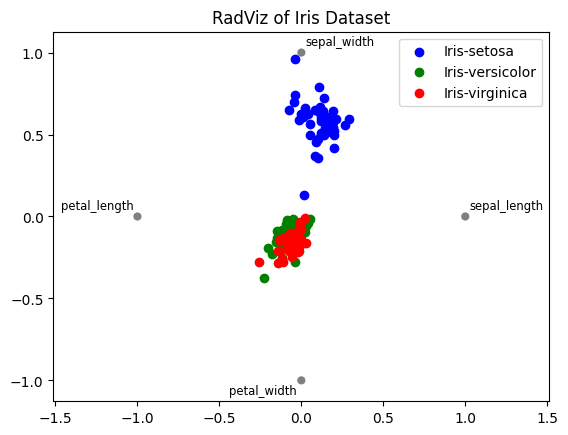

In [ ]:
# Plotting RadViz
radviz(df, 'class', color=['blue', 'green', 'red'])
plt.title('RadViz of Iris Dataset')
plt.show()

## 3 - Switch to using "test_train_split" instead of using "-30" and slicing

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split

def run():
    # Ensure the dataset is available
    if not os.path.exists('iris.data'):
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
        df = pd.read_csv(url, header=None)
        df.to_csv('iris.data', header=False, index=False)

    # Load the dataset
    df = pd.read_csv('./iris.data', header=None)
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

    # Reorder the data (optional)
    reordering = np.random.permutation(df.index)
    df = df.reindex(reordering)

    # Features and target
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Make a model
    classifier = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

    # Evaluate the model
    score = classifier.score(X_test, y_test)
    print(f"Model accuracy: {score}")

    # Predict the type of flower for a given sample
    samples = pd.DataFrame([[4.7, 3.4, 1.1, 0.2]], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    prediction = classifier.predict(samples)
    print(f"Predicted class for sample {samples.values}: {prediction}")

# Run the function
run()


Model accuracy: 1.0
Predicted class for sample [[4.7 3.4 1.1 0.2]]: ['Iris-setosa']


## 4 - Instead of using "score", use "cross_val_score": http://scikit-learn.org/stable/modules/cross_validation.html
  - cross-validation

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score

def run():
    # Ensure the dataset is available
    if not os.path.exists('iris.data'):
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
        df = pd.read_csv(url, header=None)
        df.to_csv('iris.data', header=False, index=False)

    # Load the dataset
    df = pd.read_csv('./iris.data', header=None)
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

    # Reorder the data (optional)
    reordering = np.random.permutation(df.index)
    df = df.reindex(reordering)

    # Features and target
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Make a model
    classifier = svm.SVC(kernel='linear', C=1)

    # Evaluate the model using cross-validation
    scores = cross_val_score(classifier, X, y, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean cross-validation score: {scores.mean()}")

    # Fit the model on the entire training data
    classifier.fit(X_train, y_train)

    # Predict the type of flower for a given sample
    samples = pd.DataFrame([[4.7, 3.4, 1.1, 0.2]], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    prediction = classifier.predict(samples)
    print(f"Predicted class for sample {samples.values}: {prediction}")

# Run the function
run()


Cross-validation scores: [0.96666667 0.96666667 1.         0.96666667 0.96666667]
Mean cross-validation score: 0.9733333333333334
Predicted class for sample [[4.7 3.4 1.1 0.2]]: ['Iris-setosa']
